In [1]:
import json
import seaborn as sns 
import pprint as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.linear_model import LinearRegression

In [2]:
def get_network_name(name):
    if "e+2304+v+512" in name:
        return "hypercube"
    if "e+51+v+27" in name:
        return "sun"
    if "e+15+v+14" in name:
        return "microservices"
    if "e+1273+v+512" in name:
        return "AS"
    if "spokecommunitycircle" in name:  
        return "spoke community"
    if "communitycircle" in name:  
        return "community"
    if "circle" in name:  
        return "circle"
    if "foresthubandspoke" in name:
        return "forest hub & spoke"
    if "longforesthubandspoke" in name:
        return "long forest hub & spoke"
    if "hubandspoke" in name:
        return "hub & spoke"
    if "scalefree" in name:
        return "scalefree"
    if "smallworld" in name:
        return "smallworld"
    

In [3]:
def gen_graph(roundData, maxIter, cat, network, pf):
    x = list(range(maxIter))
    avgs = []
    medians = []
    stdev = []
    difsmax = []
    difsmin = []
    for k in roundData.keys():   
        lst = roundData[k]
        avg = sum(lst) / len(lst)
        med = statistics.median(lst)
        medians.append(med)
        avgs.append(avg)
        var = sum((x-avg)**2 for x in lst) / len(lst)
        std = var**0.5
        difsmin.append(avg +std)
        difsmax.append(avg-std)
        stdev.append(stdev)
    fig, ax = plt.subplots()
    ax.plot(x, avgs, '-')
    plt.ylim(0, 1)
    ax.fill_between(x, difsmin, difsmax, alpha=0.2)
    ax.set_xlabel('round number')  # Add an x-label to the axes.
    ax.set_ylabel(cat)  # Add a y-label to the axes.
    ax.set_title(network + " pf=" + pf)  # Add a title to the axes.
    #ax.legend()  # Add a legend.
    
    
def load_JSON(cat):
    folder = './jsonDataReport'
    roundData = {}
    import os    
    files = os.listdir(folder)
    for fname in files:
        with open(folder+'/'+fname, "r") as f:
            data = json.load(f)            
        network = get_network_name(fname)
        maxIter = int(data['maxIter'][0])
        pf = str(data['pf'][0])
        nhopsPrune = int(data['nhopsPrune'][0])        
        for i in range(maxIter):            
             df = pd.DataFrame(data[str(i)].values())             
             if i not in roundData:               
                 roundData[i] = []                    
             roundData[i].extend(df[cat].tolist())            
    return maxIter, roundData, network, pf

    
def load_JSON2(cat, prefix):
    folder = './jsonDataReport'
    roundData = {}
    import os    
    files = os.listdir(folder)
    for fname in files:
        if(prefix in fname):
            print("ntra")
            with open(folder+'/'+fname, "r") as f:
                data = json.load(f)            
            network = get_network_name(fname)
            maxIter = int(data['maxIter'][0])
            pf = str(data['pf'][0])
            nhopsPrune = int(data['nhopsPrune'][0])        
            for i in range(maxIter):            
                 df = pd.DataFrame(data[str(i)].values())             
                 if i not in roundData:               
                     roundData[i] = []                    
                 roundData[i].extend(df[cat].tolist())            
    return maxIter, roundData, network, pf

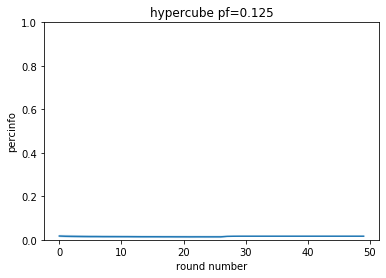

In [8]:
cat = 'percinfo'
maxIter, roundData, network, pf = load_JSON(cat)
gen_graph(roundData, maxIter, cat, network, pf)

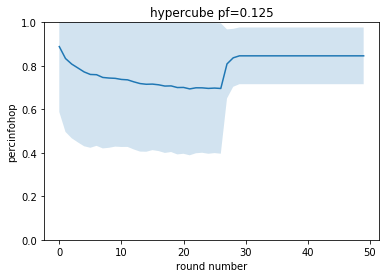

In [9]:
cat = 'percinfohop'
maxIter, roundData, network, pf = load_JSON(cat)
gen_graph(roundData, maxIter, cat, network, pf)

ntra


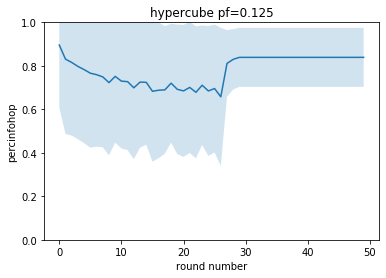

In [10]:
#a way to predict which node is going to fail
# have a counter of nodes that have info about a node
# evaluate betweeness centrality at each step see if we can associate probability of failure in runtime
# statistic analysis
#number of hops vs some network metric to kwon which information is going to be synch fast
cat = 'percinfohop'
maxIter, roundData, network, pf = load_JSON2(cat, "20210921114719")
gen_graph(roundData, maxIter, cat, network, pf)

ntra


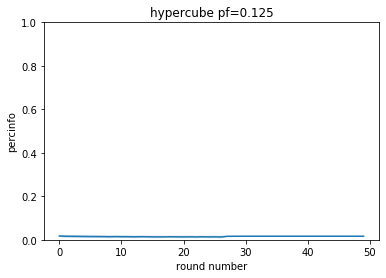

In [11]:
cat = 'percinfo'
maxIter, roundData, network, pf = load_JSON2(cat, "20210921114719")
gen_graph(roundData, maxIter, cat, network, pf)

processing...exp+ps+0+pf+0.125+mode+FirstNeighbor+maxIter+50+e+2304+v+512+load+replalgon+NODELAY+nhopsinfo+redFactor+3+20210921114738+jsonDataReport.json
[10, 6, 6, 5, 4, 5, 5, 8, 9, 10, 10, 10, 9, 8, 7, 8, 7, 6, 5, 5, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


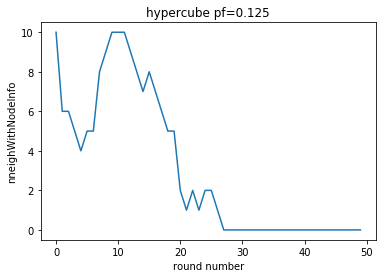

In [39]:
import os

def gen_graph(roundData, maxIter, cat, network, pf):
    x = list(range(maxIter))
    avgs = []
    medians = []
    stdev = []
    difsmax = []
    difsmin = []
    '''
    for k in roundData.keys():   
        lst = roundData[k]
        avg = sum(lst) / len(lst)
        med = statistics.median(lst)
        medians.append(med)
        avgs.append(avg)
        var = sum((x-avg)**2 for x in lst) / len(lst)
        std = var**0.5
        difsmin.append(avg +std)
        difsmax.append(avg-std)
        stdev.append(stdev)
    '''
    fig, ax = plt.subplots()
    ax.plot(x, roundData, '-')
    #plt.ylim(0, 1)
    #ax.fill_between(x, difsmin, difsmax, alpha=0.2)
    ax.set_xlabel('round number')  # Add an x-label to the axes.
    ax.set_ylabel(cat)  # Add a y-label to the axes.
    ax.set_title(network + " pf=" + pf)  # Add a title to the axes.
    #ax.legend()  # Add a legend.

def load_JSON3(cat, prefix, id_node):
    folder = './jsonDataReport'
    roundData = {} 
    lvals = []
    files = os.listdir(folder)
    for fname in files:
        if(prefix in fname):
            print("processing..." + fname)
            with open(folder+'/'+fname, "r") as f:
                data = json.load(f)            
            network = get_network_name(fname)
            maxIter = int(data['maxIter'][0])
            pf = str(data['pf'][0])
            nhopsPrune = int(data['nhopsPrune'][0])        
            for i in range(maxIter):    
                if id_node in data[str(i)]:
                    #print(i, data[str(i)][id_node])
                    lvals.append(data[str(i)][id_node]["nneighWithNodeInfo"])
                else:
                    lvals.append(0)
    print(lvals)
    return maxIter, lvals, network, pf


'''

(0, 1, 0, 1, 1, 0, 0, 0, 0)', '(1, 0, 1, 1, 1, 1, 1, 0, 0)',
       '(1, 1, 0, 1, 1, 1, 0, 0, 0)', '(1, 0, 1, 0, 0, 0, 0, 0, 1)',
       '(1, 1, 0, 1, 1, 1, 0, 0, 1)
'''
cat = 'nneighWithNodeInfo'
maxIter, roundData, network, pf = load_JSON3(cat, "20210921114738", '(1, 1, 0, 1, 1, 1, 0, 0, 1)')
gen_graph(roundData, maxIter, cat, network, pf)

In [15]:

folder = './jsonDataReport'
fname = "exp+ps+0+pf+0.125+mode+FirstNeighbor+maxIter+50+e+2304+v+512+load+replalgon+NODELAY+nhopsinfo+redFactor+3+20210921114738+jsonDataReport.json"
with open(folder+'/'+fname, "r") as f:
    data = json.load(f)
df = pd.DataFrame(data[str(14)].values())   
df.head()

,percinfo,nneignhops,sizeinfo,version,nneighWithNodeInfo,status,percinfohop
0,0.017578,10,9,3,10,alive,0.9
1,0.003906,10,2,4,5,alive,0.2
2,0.013672,10,7,2,7,alive,0.7
3,0.019531,10,10,1,9,alive,1.0
4,0.003906,10,2,2,5,alive,0.2


In [16]:
df['status'].value_counts()

alive     477
failed     35
Name: status, dtype: int64

In [17]:
data.keys()

dict_keys(['44', '45', '46', '47', '48', '49', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '20', '21', 'nhopsPrune', '22', '23', '24', '25', '26', '27', '28', '29', 'maxIter', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', 'pf', '40', '41', '42', '43'])

## Neighbours of node that failed

In [ ]:
cat = 'nneighWithNodeInfo'
maxIter, roundData, network, pf = load_JSON3(cat, "20210723194538", 'p0')
gen_graph(roundData, maxIter, cat, network, pf)

In [ ]:
cat = 'nneighWithNodeInfo'
maxIter, roundData, network, pf = load_JSON3(cat, "20210723194538", 'p49')
gen_graph(roundData, maxIter, cat, network, pf)

In [ ]:
cat = 'nneighWithNodeInfo'
maxIter, roundData, network, pf = load_JSON3(cat, "20210723194538", 'p51')
gen_graph(roundData, maxIter, cat, network, pf)

## Dataframe creation

In [18]:
experiment_events = []
for round_number, round_info in data.items():
    try:
        for node_number, node_info in round_info.items():
            event_info = {
                'roundNumber': int(round_number),
                'nodeNumber': node_number
            }
            event_info.update(node_info)
            experiment_events.append(event_info)
    except:
        continue

In [22]:
df_flattened_exp = pd.DataFrame(experiment_events)
df_flattened_exp.sort_values('roundNumber', inplace=True)
df_flattened_exp.head(1)

,roundNumber,nodeNumber,percinfo,nneignhops,sizeinfo,version,nneighWithNodeInfo,status,percinfohop
8192,0,"(0, 1, 1, 0, 0, 0, 1, 0, 1)",0.019531,10,10,1,10,alive,1.0


## Dataframe null check

In [29]:
df_flattened_exp.isnull().sum()

roundNumber           0
nodeNumber            0
percinfo              0
nneignhops            0
sizeinfo              0
version               0
nneighWithNodeInfo    0
status                0
percinfohop           0
dtype: int64

In [30]:
df_failing_node = df_flattened_exp[
    df_flattened_exp['nodeNumber'] == 'p65'
].copy(deep=True).sort_index()

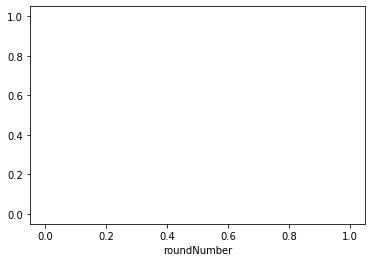

In [31]:
df_failing_node.set_index('roundNumber', inplace=True)
df_failing_node.sort_index(inplace=True)
df_failing_node['nneighWithNodeInfo'].plot()

In [32]:
data['5']['p65']

KeyError: 'p65'

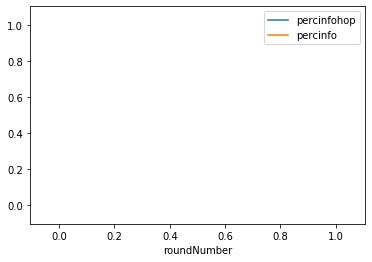

In [33]:
df_failing_node[['percinfohop', 'percinfo']].plot()

## Nodes that have more rounds in failure state

In [34]:
df_flattened_exp[df_flattened_exp['status'] == 'failed']['nodeNumber'].value_counts().to_frame()

,nodeNumber
"(1, 0, 1, 0, 0, 0, 0, 0, 1)",43
"(1, 0, 1, 1, 1, 1, 1, 0, 0)",42
"(0, 1, 0, 1, 1, 0, 0, 0, 0)",32
"(1, 1, 0, 1, 1, 1, 0, 0, 1)",31
"(1, 1, 0, 1, 1, 1, 0, 0, 0)",30
...,...
"(0, 0, 1, 1, 0, 1, 1, 1, 1)",1
"(1, 1, 1, 0, 0, 1, 0, 0, 1)",1
"(0, 1, 0, 1, 1, 0, 0, 1, 0)",1
"(0, 1, 1, 0, 0, 0, 1, 0, 1)",1


## Nombres de nodos que en la última ronda no estaban vivos

In [35]:
df_flattened_exp[
    (df_flattened_exp['roundNumber'] == df_flattened_exp['roundNumber'].max()) &
    (df_flattened_exp['status'] == 'failed')
]['nodeNumber'].unique()

array(['(0, 1, 0, 1, 1, 0, 0, 0, 0)', '(1, 0, 1, 1, 1, 1, 1, 0, 0)',
       '(1, 1, 0, 1, 1, 1, 0, 0, 0)', '(1, 0, 1, 0, 0, 0, 0, 0, 1)',
       '(1, 1, 0, 1, 1, 1, 0, 0, 1)'], dtype=object)

## Nodes Version

Each time that a node fails and it is recreated a new node version is added. 

In [36]:
df_flattened_exp.groupby('nodeNumber')['version'].max().sort_values(ascending=False)

nodeNumber
(1, 0, 0, 0, 0, 0, 1, 1, 1)    9
(1, 0, 0, 1, 0, 1, 1, 1, 1)    9
(1, 0, 0, 0, 1, 1, 1, 0, 1)    9
(1, 1, 1, 0, 0, 1, 0, 1, 1)    8
(0, 0, 1, 1, 0, 0, 0, 0, 0)    8
                              ..
(1, 0, 0, 1, 0, 1, 0, 1, 1)    1
(1, 0, 0, 0, 1, 1, 1, 1, 1)    1
(0, 1, 1, 1, 0, 0, 0, 0, 0)    1
(0, 0, 1, 0, 0, 0, 1, 1, 1)    1
(0, 1, 1, 1, 1, 1, 1, 1, 1)    1
Name: version, Length: 512, dtype: int64